In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score,train_test_split, KFold, cross_val_predict
from sklearn.metrics import mean_squared_error,r2_score,roc_curve,auc,precision_recall_curve, accuracy_score, \
recall_score, precision_score, confusion_matrix
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, ParameterGrid, StratifiedKFold
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier, BaggingRegressor,BaggingClassifier,RandomForestRegressor,RandomForestClassifier,AdaBoostRegressor,AdaBoostClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
import itertools as it
import time as time
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from sklearn.metrics import mean_absolute_error

In [78]:
def confusion_matrix_data(data,actual_values,model,cutoff=0.5):
    pred_values = model.predict_proba(data)[:,1]
    bins=np.array([0,cutoff,1])
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
    accuracy = 100*(cm[0,0]+cm[1,1])/cm.sum()
    precision = 100*(cm[1,1])/(cm[1,1]+cm[0,1])
    print("Accuracy = ", accuracy)
    print("precision = ", precision)
    return (" ")

In [2]:
data = pd.read_csv('data_dropped.csv')

In [3]:
data

,kw_min_min,kw_max_avg,kw_avg_min,kw_avg_max,kw_avg_avg,kw_max_min,self_reference_min_shares,num_imgs,lda_01,lda_04,...,kw_max_max,title_subjectivity,abs_title_subjectivity,data_channel_is_socmed,max_negative_polarity,abs_title_sentiment_polarity,rate_positive_words,min_negative_polarity,max_positive_polarity,popular
0,0.0,0.000000,0.000,0.000000,0.000000,0.0,496.0,1.0,0.378279,0.040123,...,0.0,0.500000,0.000000,0.0,-0.200000,0.187500,0.769231,-0.600,0.70,0
1,0.0,0.000000,0.000,0.000000,0.000000,0.0,0.0,1.0,0.050047,0.050001,...,0.0,0.000000,0.500000,0.0,-0.100000,0.000000,0.733333,-0.125,0.70,0
2,0.0,0.000000,0.000,0.000000,0.000000,0.0,918.0,1.0,0.033334,0.682188,...,0.0,0.000000,0.500000,0.0,-0.133333,0.000000,0.857143,-0.800,1.00,0
3,0.0,0.000000,0.000,0.000000,0.000000,0.0,0.0,1.0,0.419300,0.028572,...,0.0,0.000000,0.500000,0.0,-0.166667,0.000000,0.666667,-0.600,0.80,0
4,0.0,0.000000,0.000,0.000000,0.000000,0.0,545.0,20.0,0.028794,0.885427,...,0.0,0.454545,0.045455,0.0,-0.050000,0.136364,0.860215,-0.500,1.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,-1.0,4004.342857,173.125,374962.500000,3031.115764,671.0,11400.0,1.0,0.025001,0.773260,...,843300.0,0.100000,0.400000,0.0,-0.125000,0.000000,0.722222,-0.500,0.75,1
39640,-1.0,5470.168651,184.000,192985.714286,3411.660830,616.0,2100.0,3.0,0.028575,0.028575,...,843300.0,0.300000,0.200000,1.0,-0.100000,1.000000,0.812500,-0.400,0.70,1
39641,-1.0,6880.687034,168.250,295850.000000,4206.439195,691.0,1400.0,12.0,0.025025,0.146970,...,843300.0,0.454545,0.045455,0.0,-0.166667,0.136364,0.576923,-0.800,0.50,1
39642,-1.0,3384.316871,-1.000,254600.000000,1777.895883,0.0,452.0,1.0,0.040003,0.040004,...,843300.0,0.000000,0.500000,0.0,-0.012500,0.000000,0.466667,-0.500,0.50,1


In [85]:
y = data['popular']
X = data.drop(['popular'], axis=1)

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, random_state = 42)

In [87]:
model = DecisionTreeClassifier(random_state=1).fit(X_train,y_train)

In [88]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)

Accuracy: 0.6647748770336739
Precision: 0.6605922551252847


In [71]:
parameters = {'max_features': [20,30,40,50],
              'max_depth': [5,10,15,20],
              'max_leaf_nodes': [5,10,20,30,40,50]}

cv = KFold(n_splits = 5, shuffle=True, random_state=45)

grid = GridSearchCV(DecisionTreeClassifier(random_state=1), parameters, n_jobs=-1, verbose=1, cv=cv,
                    scoring='neg_mean_absolute_error')

grid.fit(X_train, y_train)
print(grid.best_score_, grid.best_params_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
-0.24890430395711807 {'max_depth': 10, 'max_features': 30, 'max_leaf_nodes': 20}


In [89]:
model = DecisionTreeClassifier(random_state=1,max_depth=10,max_features=30,max_leaf_nodes=20).fit(X_train,y_train)

In [90]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)

Accuracy: 0.7569680918148568
Precision: 0.7406159769008662


In [93]:
thresholds = np.arange(0.01, 2, 0.1)
accuracy_scores = []
precision_scores = []

kf = KFold(n_splits=5) 

for threshold in thresholds:
    model = model
    y_pred_probs = cross_val_predict(model, X, y, cv=kf, method='predict_proba')
    y_pred = np.where(y_pred_probs[:, 1] >= threshold, 1, 0)
    accuracy_scores.append(accuracy_score(y, y_pred))
    precision_scores.append(precision_score(y, y_pred))

C:\Users\akaur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\akaur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\akaur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\akaur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision 

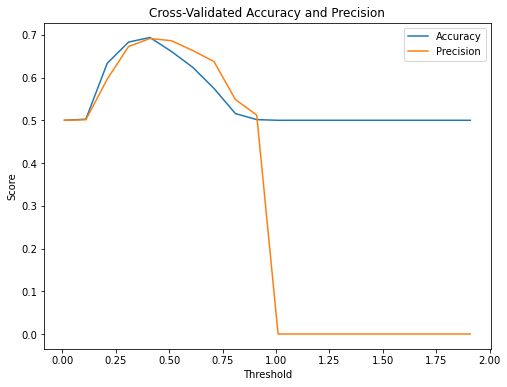

In [111]:
plt.figure(figsize=(8, 6))
plt.plot(thresholds, accuracy_scores, label='Accuracy')
plt.plot(thresholds, precision_scores, label='Precision')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Cross-Validated Accuracy and Precision')
plt.legend()
plt.show()

In [110]:
threshold = 0.50

model = model
y_pred_probs_test = model.predict_proba(X_test)
y_pred_test = np.where(y_pred_probs_test[:, 1] >= threshold, 1, 0)

accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)

print("Test Accuracy:", accuracy_test)
print("Test Precision:", precision_test)

Test Accuracy: 0.7569680918148568
Test Precision: 0.7406159769008662
